In [2]:
from sklearn.datasets import make_circles
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [4]:
X,Y = make_circles(n_samples=500,noise=0.02)
X.shape,Y.shape

((500, 2), (500,))

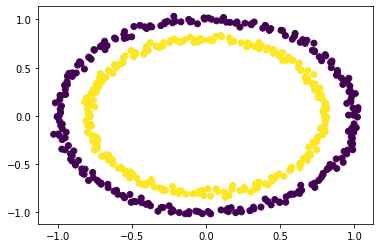

In [5]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [6]:
def phi(X):
    """"Non Linear Transformation"""
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = X1**2 + X2**2
    
    X_ = np.zeros((X.shape[0],3))
    print(X_.shape)
    
    X_[:,:-1] = X
    X_[:,-1] = X3

    return X_

In [7]:
X_ = phi(X)

(500, 3)


In [8]:
X_.shape

(500, 3)

In [9]:
print(X_[:3,:])

[[-0.54817134  0.62281065  0.68838492]
 [ 0.80585321  0.13311646  0.66711939]
 [ 0.63900283  0.47183342  0.6309514 ]]


In [10]:
def plot3d(X,show=True):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111,projection='3d')
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = X[:,2]
    
    ax.scatter(X1,X2,X3,zdir='z',s=20,c=Y,depthshade=True)
    
    if(show==True):
        plt.show()
    return ax
    


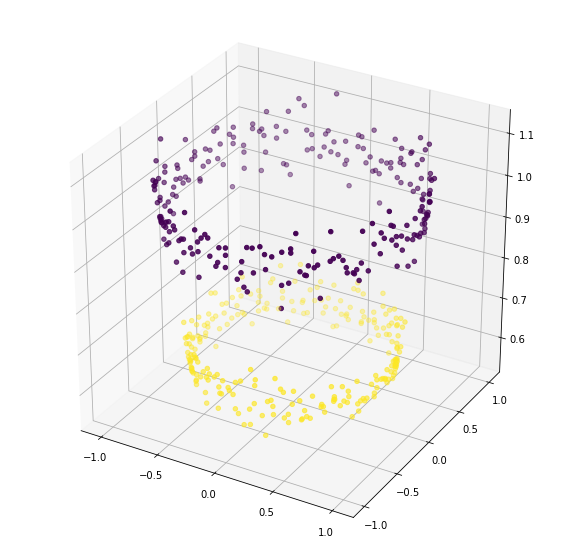

In [11]:
ax = plot3d(X_)

Logical Classifier

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [13]:
lr = LogisticRegression()

In [14]:
acc = cross_val_score(lr,X,Y,cv=5).mean()
print("Accuracy X(2D) is %.4f"%(acc*100))

Accuracy X(2D) is 43.2000


In [15]:
acc = cross_val_score(lr,X_,Y,cv=5).mean()
print("Accuracy X(2D) is %.4f"%(acc*100))

Accuracy X(2D) is 100.0000


In [16]:
lr.fit(X_,Y)

LogisticRegression()

In [17]:
wts = lr.coef_
print(wts)

[[ 1.93340923e-02  5.11492288e-03 -1.08588568e+01]]


In [19]:
bias = lr.intercept_
lr.intercept_

array([8.92050787])

In [21]:
xx,yy = np.meshgrid(range(-1,2),range(-1,2))
print(xx)
print(yy)

[[-1  0  1]
 [-1  0  1]
 [-1  0  1]]
[[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]


In [22]:
z = -(wts[0,0]*xx + wts[0,1]*yy+bias)/wts[0,2]
print(z)

[[0.81924451 0.821025   0.82280549]
 [0.81971555 0.82149604 0.82327653]
 [0.82018659 0.82196708 0.82374757]]


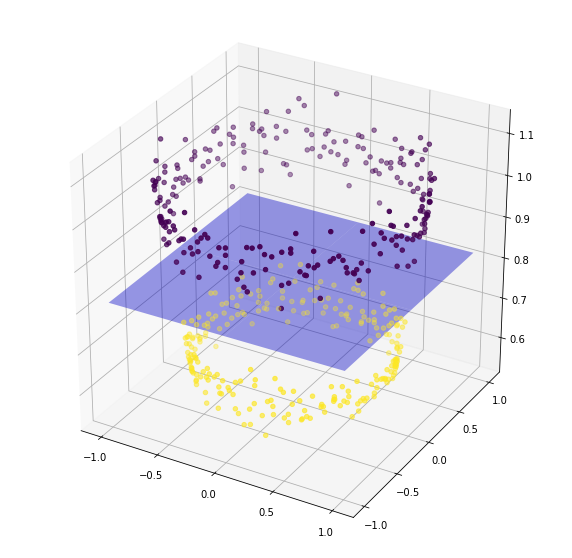

In [28]:
ax = plot3d(X_,False)
ax.plot_surface(xx,yy,z,alpha=0.4,color='blue')
plt.show()